In [ ]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset=pd.read_csv("Churn_Modelling.csv")

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
X=dataset.iloc[:,3:13]

In [ ]:
y=dataset.iloc[:,13]

In [ ]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [ ]:
y


0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
geography=pd.get_dummies(X['Geography'],drop_first=True)

In [ ]:
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [ ]:
X=X.drop(['Geography','Gender'],axis=1)

In [ ]:
X=pd.concat([X,geography,gender],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:

X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
classifier=Sequential()

In [ ]:
classifier.add(Dense(units=11,activation='relu'))

In [ ]:
classifier.add(Dense(units=7,activation='relu'))

In [ ]:
classifier.add(Dense(units=6,activation='relu'))

In [ ]:
classifier.add(Dense(1,activation='sigmoid'))

In [ ]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics='accuracy')

In [ ]:
import tensorflow as tf
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
m_h=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 5s 5ms/step - loss: 0.4198 - accuracy: 0.8225 - val_loss: 0.3840 - val_accuracy: 0.8368
Epoch 2/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3619 - accuracy: 0.8535 - val_loss: 0.3656 - val_accuracy: 0.8470
Epoch 3/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3521 - accuracy: 0.8569 - val_loss: 0.3613 - val_accuracy: 0.8497
Epoch 4/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3484 - accuracy: 0.8582 - val_loss: 0.3907 - val_accuracy: 0.8353
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3479 - accuracy: 0.8550 - val_loss: 0.3601 - val_accuracy: 0.8497
Epoch 6/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3440 - accuracy: 0.8599 - val_loss: 0.3612 - val_accuracy: 0.8478
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3408 - accuracy: 0.8584 - val_loss: 0.3630 - val_accuracy:

In [ ]:
m_h.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

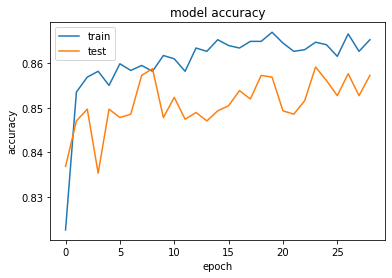

In [ ]:
plt.plot(m_h.history['accuracy'])
plt.plot(m_h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

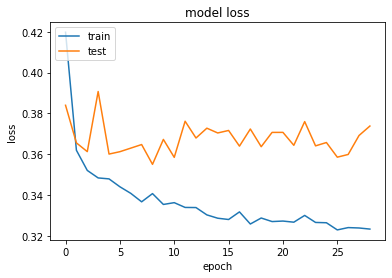

In [ ]:
plt.plot(m_h.history['loss'])
plt.plot(m_h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()